# Vibration data Exploratory Analysis and merge

This notebook is used to do a bit or Data Exploration on the two vibration data sources
Data sources are:
* Data from a set of four `*.txt.csv` files, holding one unified prediction for all 3 (X1,X2,Y1) axis tuples. These files are the ones which have been used to train a SPSS model.
* Data from I-Care which was originally in JSON files in a `ICareData.zip` file, converted to `ICareData.csv` and held as project data assets. This file has an individual prediction for each axis (axes cannot be correlated by timestamps which don't match)

Eventually, it merges the two data sources into a single one to be used for AutoAI condition prediction.   
The final merged data file has individual predictions for each of the X1, X2, Y1 axis

In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='98b90784-9892-4cac-8229-eeeac6d31ae6', project_access_token='p-61f44d52f0cacd13793e6fa4811babea618a6029')
pc = project.project_context


In [2]:
# read-in the datafiles into a single one
import pandas as pd
df=pd.concat([pd.read_csv(project.get_file(f['name'])) for f in project.get_files() if f['name'].endswith('.txt.csv')])
df.describe(include='all')

,_msgid,X1_order1_fftv,X2_order1_fftv,Y1_order1_fftv,X1_order2_fftv,X2_order2_fftv,Y1_order2_fftv,X1_order3_fftv,X2_order3_fftv,Y1_order3_fftv,X1_order1_fftg,X2_order1_fftg,Y1_order1_fftg,X1_order2_fftg,X2_order2_fftg,Y1_order2_fftg,X1_order3_fftg,X2_order3_fftg,Y1_order3_fftg,Problem
count,85,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85
unique,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,a70f5f06.f8a34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wheel_imbalance
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
mean,NaN,27.920807,46.365643,40.309757,0.948227,0.803556,0.566463,2.982382,4.461433,0.941361,0.275848,0.458162,0.398248,0.018849,0.015932,0.011216,0.089531,0.135741,0.028182,NaN
std,NaN,23.213666,29.354492,36.118483,0.396708,0.369244,0.236450,1.008737,1.029319,0.393622,0.229346,0.290074,0.356843,0.008004,0.007408,0.004787,0.030571,0.031684,0.011889,NaN
min,NaN,0.000000,0.000000,0.000000,0.156130,0.137076,0.157533,0.230286,0.616978,0.229244,0.000000,0.000000,0.000000,0.000000,0.002701,0.002493,0.003188,0.008635,0.006210,NaN
25%,NaN,4.361700,11.264486,4.665165,0.666090,0.547066,0.380249,2.313674,3.857964,0.626511,0.043076,0.111292,0.046087,0.013291,0.010318,0.007565,0.068968,0.117817,0.018854,NaN
50%,NaN,14.308462,37.656358,13.745461,0.902436,0.750107,0.520824,2.915149,4.357087,0.943896,0.141362,0.372063,0.135800,0.017967,0.014704,0.010362,0.087680,0.132556,0.028662,NaN
75%,NaN,38.067501,64.905047,55.245126,1.168175,1.097769,0.734087,3.585659,5.260465,1.205779,0.376067,0.641373,0.545769,0.023299,0.021697,0.014616,0.106952,0.160489,0.036017,NaN


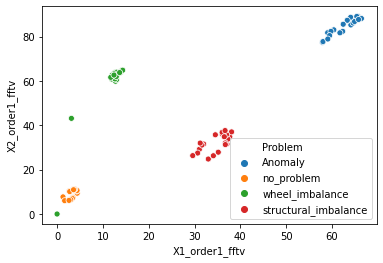

In [3]:
import seaborn as sns
sns.scatterplot(x="X1_order1_fftv", y="X2_order1_fftv", data=df, hue="Problem");

In [5]:
def snsPlot(df,hueCol,markerCol,columns):
    import seaborn as sns
    g = sns.PairGrid(df, hue=hueCol, vars=columns)
    g.map_lower(sns.scatterplot,style=df[markerCol] if markerCol else None)
    g.map_diag(sns.kdeplot)
    g.map_upper(sns.kdeplot);

Note in the plot below that the condition colored by condition can clearly be seen, notably in the `order1` plots.

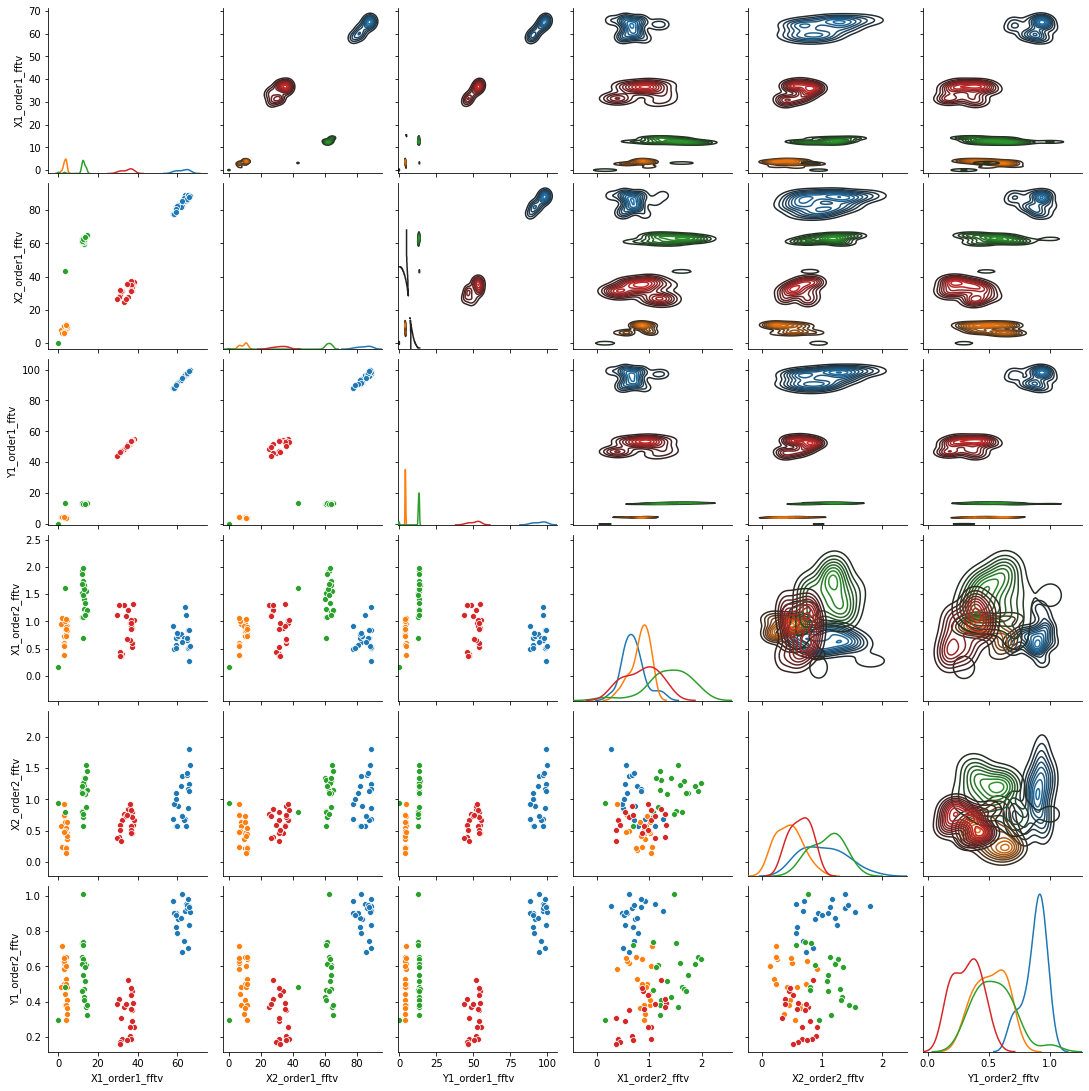

In [6]:
# Analyse fftv of order 1 to 3
snsPlot(df,'Problem',None,[f"{axis}_order{o}_fftv" for o in (1,2) for axis in ('X1','X2','Y1')]);

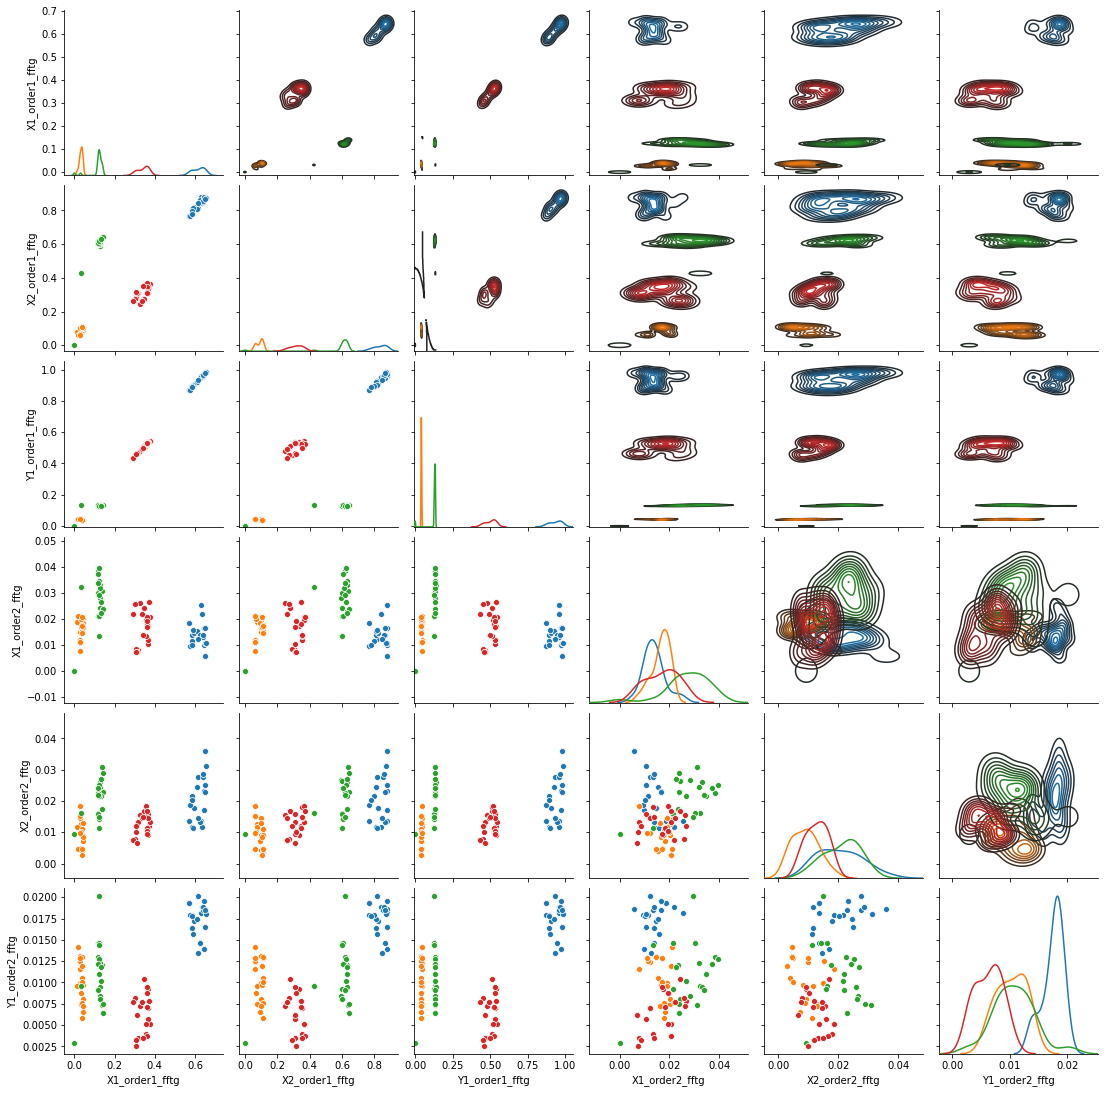

In [7]:
# Analyse fftg of order 1 and 2 for the 3 axis
snsPlot(df,'Problem',None,[f"{axis}_order{o}_fftg" for o in (1,2) for axis in ('X1','X2','Y1')]);

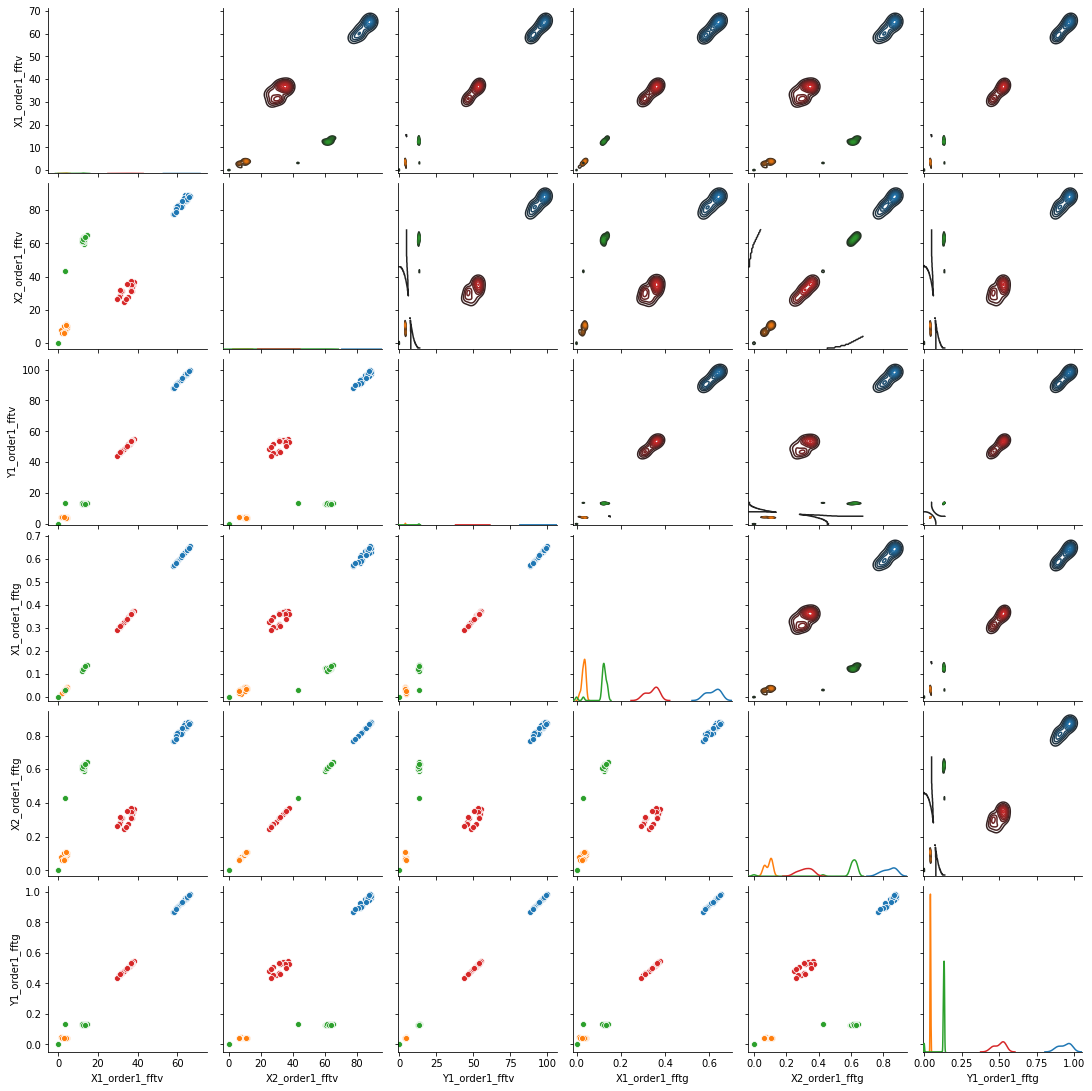

In [8]:
# Analyse fftv vs fftg of order 1
snsPlot(df,"Problem",None,[f"{axis}_order1_fft{f}" for f in ('v','g') for axis in ('X1','X2','Y1')]);

In [9]:
# Read the second data file
dfICData=pd.read_csv(project.get_file('ICareData.csv'))
dfICData.describe(include='all')

,deviceid,timestamp,condition,order1_fftg,order1_fftv,order2_fftg,order2_fftv,order3_fftg,order3_fftv,order4_fftg,...,order5_fftg,order5_fftv,order6_fftg,order6_fftv,order7_fftg,order7_fftv,order8_fftg,order8_fftv,speed,temperature
count,91,91,91,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,...,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
unique,3,90,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2_X,2020-03-11 13:43:26,SIandWI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,77,2,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.464612,47.019329,0.015805,0.797350,0.126490,4.162512,0.115624,...,0.416157,8.355776,0.656297,10.887780,0.447075,6.394118,0.136572,1.751276,656.729959,29.720697
std,NaN,NaN,NaN,0.300303,30.390596,0.007501,0.374161,0.041880,1.364576,0.058183,...,0.182711,3.667890,0.208610,3.463364,0.142063,2.035564,0.041338,0.525223,34.673686,0.546496
min,NaN,NaN,NaN,0.000000,0.000000,0.002701,0.137076,0.008635,0.462136,0.002421,...,0.000000,0.061489,0.000000,0.027747,0.000000,0.038933,0.000000,0.048706,329.687592,29.076832
25%,NaN,NaN,NaN,0.125563,12.708741,0.010027,0.511572,0.107108,3.503728,0.067822,...,0.285741,5.730607,0.558531,9.281038,0.368554,5.265162,0.113883,1.433465,659.751022,29.279417
50%,NaN,NaN,NaN,0.426622,43.167234,0.014704,0.750107,0.126821,4.182951,0.124431,...,0.391683,7.863033,0.709308,11.788187,0.455066,6.511633,0.133211,1.731659,659.874512,29.482000
75%,NaN,NaN,NaN,0.774621,78.386647,0.020760,1.051002,0.157312,5.168395,0.150846,...,0.578920,11.620825,0.779050,12.942462,0.552291,7.926682,0.163701,2.068974,661.284927,30.298519


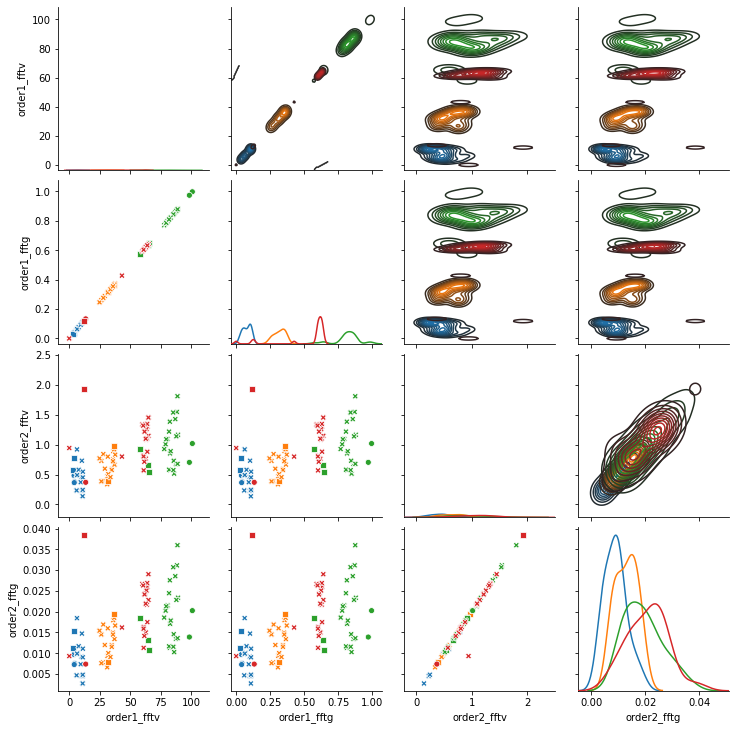

In [10]:
# PLot fftv|g orders 1 and 2
snsPlot(dfICData,'condition','deviceid',[f"order{o}_fft{t}" for o in ('1','2') for t in ('v','g')])

In [11]:
# Plot device IDs and conditions values
print(dfICData['deviceid'].value_counts())
print(dfICData['condition'].value_counts())

2_X    77
1_X     8
1_Y     6
Name: deviceid, dtype: int64
SIandWI    27
WI         22
SI         21
normal     21
Name: condition, dtype: int64


In [12]:
# order by timestamp and deviceid
#df2.sort_values(['deviceid','timestamp'],axis='columns',inplace=True)
dfICData.sort_values('timestamp',inplace=True)
dfICData.head(10)

,deviceid,timestamp,condition,order1_fftg,order1_fftv,order2_fftg,order2_fftv,order3_fftg,order3_fftv,order4_fftg,...,order5_fftg,order5_fftv,order6_fftg,order6_fftv,order7_fftg,order7_fftv,order8_fftg,order8_fftv,speed,temperature
0,1_Y,2020-03-11 11:09:14,normal,0.043628,4.416105,0.007523,0.377955,0.028662,0.949658,0.224442,...,0.172907,3.466639,0.099390,1.647054,0.157777,2.222116,0.101716,1.306281,660.991180,30.083641
11,2_X,2020-03-11 11:10:25,normal,0.099918,10.114159,0.009143,0.458830,0.119752,3.914572,0.065720,...,0.361416,7.245149,0.468380,7.719112,0.497204,7.116087,0.196496,2.460485,661.173065,29.838095
14,2_X,2020-03-11 11:11:36,normal,0.109569,11.089802,0.009002,0.450938,0.144399,4.704596,0.050547,...,0.339030,6.809430,0.794211,13.121801,0.573713,8.191717,0.136351,1.809104,660.881012,29.801245
15,2_X,2020-03-11 11:12:48,normal,0.102258,10.350023,0.014704,0.729884,0.177441,5.803447,0.048397,...,0.341169,6.846761,0.686146,11.339361,0.431981,6.194684,0.119213,1.505757,660.991180,29.727581
16,2_X,2020-03-11 11:13:59,normal,0.109025,11.034892,0.004800,0.243696,0.126499,4.132176,0.074030,...,0.343576,6.885521,0.488834,8.013165,0.422660,6.059188,0.179423,2.244412,661.344025,29.960867
17,2_X,2020-03-11 11:15:10,normal,0.076402,7.731635,0.011658,0.579810,0.157487,5.141368,0.057336,...,0.324270,6.490149,0.717274,11.832880,0.465228,6.644618,0.107360,1.374919,661.007721,29.703026
18,2_X,2020-03-11 11:16:22,normal,0.063529,6.428810,0.009886,0.491584,0.160913,5.275272,0.073477,...,0.312133,6.259118,0.741533,12.253967,0.317668,4.550416,0.112980,1.389907,661.281799,29.936312
19,2_X,2020-03-11 11:17:34,normal,0.092786,9.390976,0.007332,0.371461,0.166255,5.445962,0.066948,...,0.309170,6.206250,0.712183,11.788187,0.324336,4.607397,0.168009,2.227172,661.282166,29.629362
20,2_X,2020-03-11 11:18:46,normal,0.110110,11.144554,0.011069,0.547066,0.191562,6.279058,0.044018,...,0.364116,7.299305,0.718063,11.878415,0.460915,6.574886,0.082519,1.098301,661.399170,29.592514
1,1_Y,2020-03-11 11:19:57,normal,0.040295,4.078732,0.007252,0.364628,0.014209,0.462136,0.227403,...,0.171558,3.436337,0.098034,1.622552,0.093699,1.321757,0.039789,0.509056,661.468811,29.617067


In [40]:
# Filter out the data from dfICData, keeping only fftv|g and orders 1-2-3
dfZ=dfICData[['deviceid','condition']+[f"order{o}_fft{f}" for o in('1','2','3') for f in ('v','g')]].copy()

# rename the deviceids to X1,X2,Y1
dfZ.loc[:,'deviceid']=dfZ['deviceid'].apply(lambda x: x[2]+x[0])
dfZ['source']='A'
dfZ.describe(include='all')

,deviceid,condition,order1_fftv,order1_fftg,order2_fftv,order2_fftg,order3_fftv,order3_fftg,source
count,91,91,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91
unique,3,4,NaN,NaN,NaN,NaN,NaN,NaN,1
top,X2,SIandWI,NaN,NaN,NaN,NaN,NaN,NaN,A
freq,77,27,NaN,NaN,NaN,NaN,NaN,NaN,91
mean,NaN,NaN,47.019329,0.464612,0.797350,0.015805,4.162512,0.126490,NaN
std,NaN,NaN,30.390596,0.300303,0.374161,0.007501,1.364576,0.041880,NaN
min,NaN,NaN,0.000000,0.000000,0.137076,0.002701,0.462136,0.008635,NaN
25%,NaN,NaN,12.708741,0.125563,0.511572,0.010027,3.503728,0.107108,NaN
50%,NaN,NaN,43.167234,0.426622,0.750107,0.014704,4.182951,0.126821,NaN
75%,NaN,NaN,78.386647,0.774621,1.051002,0.020760,5.168395,0.157312,NaN


In [33]:
print(df['Problem'].value_counts())

wheel_imbalance         22
no_problem              21
Anomaly                 21
structural_imbalance    21
Name: Problem, dtype: int64


In [41]:
# Add conditions from first table
dfs=[dfZ]
for axis in ('X1','X2','Y1'):
    dfX=df[['Problem']+[f"{axis}_order{o}_fft{f}" for o in('1','2','3') for f in ('v','g')]].copy()
    dfX['deviceid']=axis
    dfX.rename(columns={f"{axis}_order{o}_fft{f}":f"order{o}_fft{f}" for o in('1','2','3') for f in ('v','g')},inplace=True)
    dfX.rename(columns={'Problem':'condition'},inplace=True)
    dfX['source']='B'
    dfs+=[dfX]
    print(dfX.head())

  condition  order1_fftv  order1_fftg  order2_fftv  order2_fftg  order3_fftv  \
0   Anomaly    65.891204     0.650989     0.276488     0.005605     3.321618   
1   Anomaly    62.309916     0.615599     0.614240     0.012352     3.633868   
2   Anomaly    57.879726     0.571848     0.922028     0.018489     4.569994   
3   Anomaly    59.030826     0.583233     0.697025     0.013734     2.333274   
4   Anomaly    64.041790     0.632721     1.262375     0.025291     3.647641   

   order3_fftg deviceid source  
0     0.099108       X1      B  
1     0.108210       X1      B  
2     0.137350       X1      B  
3     0.069568       X1      B  
4     0.108669       X1      B  
  condition  order1_fftv  order1_fftg  order2_fftv  order2_fftg  order3_fftv  \
0   Anomaly    88.674486     0.876231     1.806795     0.035975     3.666953   
1   Anomaly    82.428344     0.814531     1.381427     0.027546     4.108103   
2   Anomaly    77.470741     0.765578     0.692005     0.013630     4.287641   
3

In [52]:
# merge all dataframes into a single one
dfMerged=pd.concat(dfs)
# Map conditions to 4 values
Problem_condition_map={
 'normal':'normal',
 'no_problem':'normal',
 'structural_imbalance':'Struct_Imbalance',
 'SI':'Struct_Imbalance',
 'wheel_imbalance':'Wheel_Imbalance',
 'WI':'Wheel_Imbalance',
 'Anomaly':'Struct_Wheel_Imbalance',
 'SIandWI':'Struct_Wheel_Imbalance',
 }
dfMerged.loc[:,'condition']=dfMerged['condition'].apply(lambda x: Problem_condition_map[x])
dfMerged.reset_index(inplace=True)

# Show results
dfMerged.describe(include='all')

,index,deviceid,condition,order1_fftv,order1_fftg,order2_fftv,order2_fftg,order3_fftv,order3_fftg,source
count,346.000000,346,346,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346
unique,NaN,3,4,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,X2,Struct_Wheel_Imbalance,NaN,NaN,NaN,NaN,NaN,NaN,B
freq,NaN,162,90,NaN,NaN,NaN,NaN,NaN,NaN,255
mean,19.300578,NaN,NaN,40.518603,0.400352,0.779219,0.015457,3.154707,0.095532,NaN
std,21.123429,NaN,NaN,30.955647,0.305870,0.374259,0.007522,1.712334,0.052360,NaN
min,0.000000,NaN,NaN,0.000000,0.000000,0.137076,0.000000,0.229244,0.003188,NaN
25%,6.000000,NaN,NaN,11.232345,0.110975,0.493805,0.009886,1.506619,0.045040,NaN
50%,13.000000,NaN,NaN,35.799144,0.353726,0.728411,0.014483,3.420684,0.103696,NaN
75%,19.000000,NaN,NaN,63.936570,0.631804,0.997869,0.019901,4.437005,0.134885,NaN


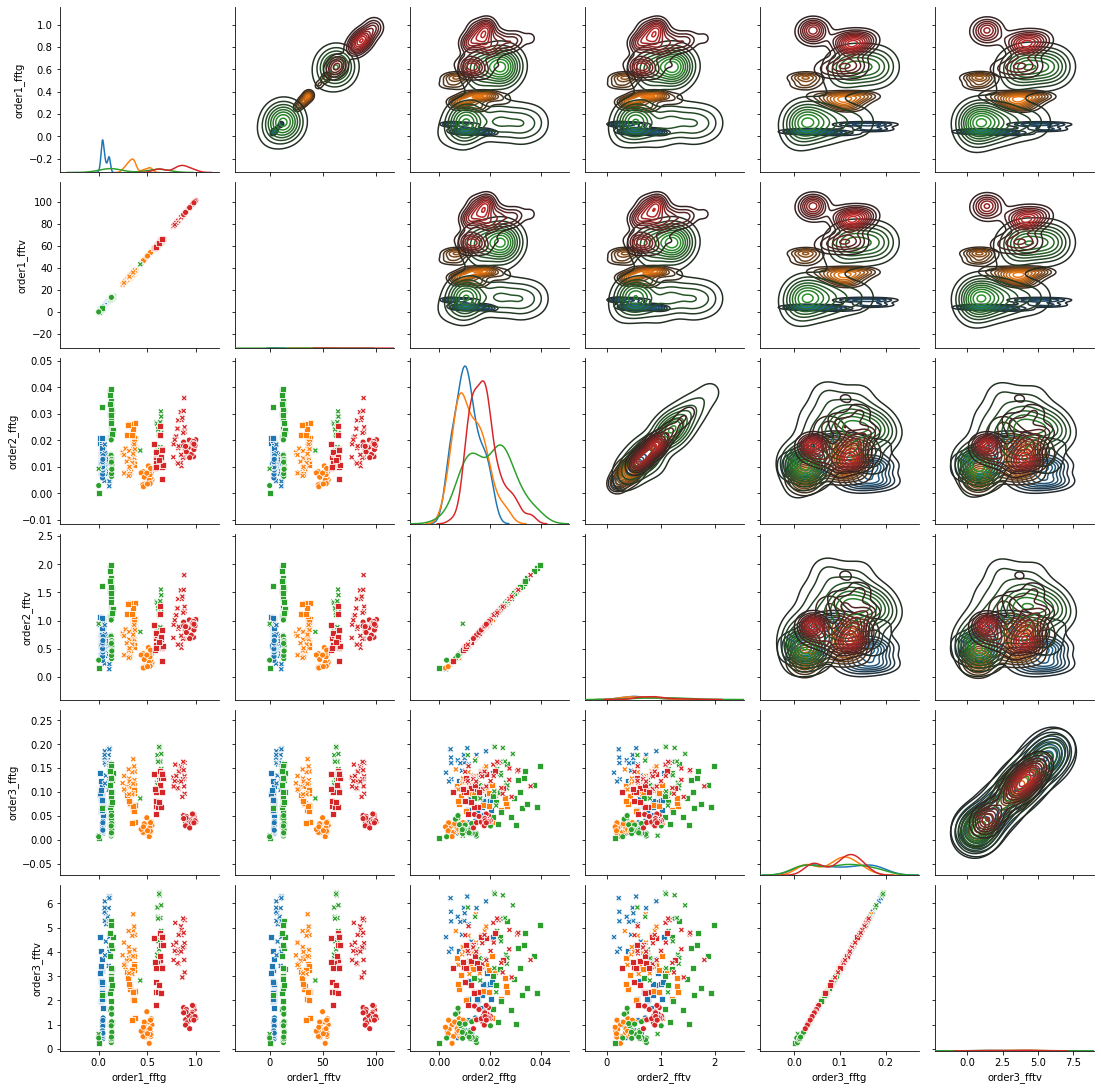

In [53]:
# Analyse fftg|v orders 1 and 2 and 3
snsPlot(dfMerged,'condition','deviceid',[f"order{o}_fft{f}" for o in (1,2,3) for f in ('g','v')]);
# sns.pairplot(data=dfMerged, hue='condition',vars=[f"order{o}_fft{f}" for o in (1,2,3) for f in ('g','v')]);

In [74]:
import io
project.save_data('VibrationMerged.csv',dfMerged.to_csv(index=False),overwrite=True)


{'file_name': 'VibrationMerged.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'mas82bearinganalysis-donotdelete-pr-wfom1mf9zxwzny',
 'asset_id': 'd805f732-30e9-4557-8d6a-b11ae4978223'}

In [75]:
pd.read_csv(project.get_file('VibrationMerged.csv')).describe(include='all')

,deviceid,condition,order1_fftv,order1_fftg,order2_fftv,order2_fftg,order3_fftv,order3_fftg
count,346,346,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
unique,3,4,NaN,NaN,NaN,NaN,NaN,NaN
top,X2,Struct_Wheel_Imbalance,NaN,NaN,NaN,NaN,NaN,NaN
freq,162,90,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.518603,0.400352,0.779219,0.015457,3.154707,0.095532
std,NaN,NaN,30.955647,0.305870,0.374259,0.007522,1.712334,0.052360
min,NaN,NaN,0.000000,0.000000,0.137076,0.000000,0.229244,0.003188
25%,NaN,NaN,11.232345,0.110975,0.493805,0.009886,1.506619,0.045040
50%,NaN,NaN,35.799144,0.353726,0.728411,0.014483,3.420685,0.103696
75%,NaN,NaN,63.936570,0.631804,0.997869,0.019901,4.437005,0.134885
